In [1]:

#Lung Cancer Prediction Using Clinical, Biochemical, and Genetic Data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [5]:
# Importing the dataset

data = pd.read_csv('lung cancer.csv')


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   8796 non-null   int64  
 1   Age                          8796 non-null   int64  
 2   Gender                       8796 non-null   object 
 3   Smoking History              8796 non-null   object 
 4   Family History               8796 non-null   object 
 5   Treatment History            6567 non-null   object 
 6   ctDNA Concentration (ng/mL)  8796 non-null   float64
 7   Mutation Type                6614 non-null   object 
 8   Gene                         7043 non-null   object 
 9   Tumor Size (cm)              8796 non-null   float64
 10  Biopsy Result                8796 non-null   object 
 11  VOC1 Concentration (ppm)     8796 non-null   float64
 12  VOC2 Concentration (ppm)     8796 non-null   float64
 13  Lung Cancer       

In [9]:
data.describe()

,Patient ID,Age,ctDNA Concentration (ng/mL),Tumor Size (cm),VOC1 Concentration (ppm),VOC2 Concentration (ppm)
count,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000
mean,4398.500000,54.652001,0.993208,3.516405,0.273246,0.276061
std,2539.330817,14.430464,0.579690,1.447529,0.130722,0.130269
min,1.000000,30.000000,0.000000,1.000000,0.050000,0.050000
25%,2199.750000,42.000000,0.490000,2.300000,0.160000,0.160000
50%,4398.500000,55.000000,0.980000,3.500000,0.280000,0.280000
75%,6597.250000,67.000000,1.500000,4.800000,0.390000,0.390000
max,8796.000000,79.000000,2.000000,6.000000,0.500000,0.500000


In [11]:
print(data.head())

   Patient ID  Age  Gender Smoking History Family History Treatment History  \
0           1   53    Male             Yes             No               NaN   
1           2   66  Female              No             No      Radiotherapy   
2           3   40  Female              No             No               NaN   
3           4   43    Male             Yes             No      Chemotherapy   
4           5   44  Female              No            Yes               NaN   

   ctDNA Concentration (ng/mL) Mutation Type  Gene  Tumor Size (cm)  \
0                         0.02      Deletion   NaN              2.5   
1                         1.61     Insertion  KRAS              1.1   
2                         1.36      Deletion  EGFR              4.7   
3                         1.93     Insertion   NaN              1.7   
4                         0.63      Deletion  EGFR              5.4   

  Biopsy Result  VOC1 Concentration (ppm)  VOC2 Concentration (ppm)  \
0      Positive            

In [13]:
data.head()

,Patient ID,Age,Gender,Smoking History,Family History,Treatment History,ctDNA Concentration (ng/mL),Mutation Type,Gene,Tumor Size (cm),Biopsy Result,VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer
0,1,53,Male,Yes,No,NaN,0.02,Deletion,NaN,2.5,Positive,0.17,0.22,Yes
1,2,66,Female,No,No,Radiotherapy,1.61,Insertion,KRAS,1.1,Positive,0.18,0.39,Yes
2,3,40,Female,No,No,NaN,1.36,Deletion,EGFR,4.7,Negative,0.26,0.31,Yes
3,4,43,Male,Yes,No,Chemotherapy,1.93,Insertion,NaN,1.7,Positive,0.26,0.29,Yes
4,5,44,Female,No,Yes,NaN,0.63,Deletion,EGFR,5.4,Negative,0.22,0.36,Yes


In [15]:
data.tail()

,Patient ID,Age,Gender,Smoking History,Family History,Treatment History,ctDNA Concentration (ng/mL),Mutation Type,Gene,Tumor Size (cm),Biopsy Result,VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer
8791,8792,55,Female,Yes,No,Surgery,0.74,NaN,EGFR,5.9,Negative,0.25,0.13,Yes
8792,8793,67,Male,No,No,Surgery,1.41,Deletion,TP53,4.6,Negative,0.26,0.26,Yes
8793,8794,40,Female,Yes,No,Surgery,1.61,Insertion,KRAS,3.1,Positive,0.25,0.21,Yes
8794,8795,52,Female,No,Yes,Chemotherapy,0.07,NaN,TP53,1.5,Positive,0.39,0.39,Yes
8795,8796,40,Male,No,No,Chemotherapy,0.83,Point Mutation,NaN,5.9,Positive,0.13,0.36,Yes


In [17]:
data.shape

(8796, 14)

In [19]:
print(data.isnull().sum())

Patient ID                        0
Age                               0
Gender                            0
Smoking History                   0
Family History                    0
Treatment History              2229
ctDNA Concentration (ng/mL)       0
Mutation Type                  2182
Gene                           1753
Tumor Size (cm)                   0
Biopsy Result                     0
VOC1 Concentration (ppm)          0
VOC2 Concentration (ppm)          0
Lung Cancer                       0
dtype: int64


In [21]:
## Handling missing value

In [23]:
# Create imputer for categorical features (with the most frequent category)
imputer = SimpleImputer(strategy='most_frequent')

In [25]:
# Impute missing values for categorical columns
data['Treatment History'] = imputer.fit_transform(data[['Treatment History']]).ravel()
data['Mutation Type'] = imputer.fit_transform(data[['Mutation Type']]).ravel()
data['Gene'] = imputer.fit_transform(data[['Gene']]).ravel()

In [27]:
# Verify the missing values are handled
print(data.isnull().sum())  # Should show no missing values


Patient ID                     0
Age                            0
Gender                         0
Smoking History                0
Family History                 0
Treatment History              0
ctDNA Concentration (ng/mL)    0
Mutation Type                  0
Gene                           0
Tumor Size (cm)                0
Biopsy Result                  0
VOC1 Concentration (ppm)       0
VOC2 Concentration (ppm)       0
Lung Cancer                    0
dtype: int64


In [29]:
# Display the first few rows after imputation
print(data.head())


   Patient ID  Age  Gender Smoking History Family History Treatment History  \
0           1   53    Male             Yes             No      Radiotherapy   
1           2   66  Female              No             No      Radiotherapy   
2           3   40  Female              No             No      Radiotherapy   
3           4   43    Male             Yes             No      Chemotherapy   
4           5   44  Female              No            Yes      Radiotherapy   

   ctDNA Concentration (ng/mL) Mutation Type  Gene  Tumor Size (cm)  \
0                         0.02      Deletion  KRAS              2.5   
1                         1.61     Insertion  KRAS              1.1   
2                         1.36      Deletion  EGFR              4.7   
3                         1.93     Insertion  KRAS              1.7   
4                         0.63      Deletion  EGFR              5.4   

  Biopsy Result  VOC1 Concentration (ppm)  VOC2 Concentration (ppm)  \
0      Positive            

In [31]:
###Data preprocessing and Handling Outliers

In [33]:
# Defining a function to remove outliers using Z-score
def remove_outliers(df, columns):
    z_scores = np.abs(stats.zscore(df[columns]))
    # Keeping only rows where the z-score is less than 3 for all columns
    return df[(z_scores < 3).all(axis=1)]

In [35]:
# Removing outliers for numerical columns
numerical_columns = ['Age', 'ctDNA Concentration (ng/mL)', 'Tumor Size (cm)', 'VOC1 Concentration (ppm)', 'VOC2 Concentration (ppm)']
data_no_outliers = remove_outliers(data, numerical_columns)

In [37]:
    # Verifying the shape after outlier removal
    print(f"Shape after outlier removal: {data_no_outliers.shape}")


Shape after outlier removal: (8796, 14)


In [41]:
# Checking skewness of numerical features before transformation
skewness = data_no_outliers[numerical_columns].skew()
print("Skewness before transformation:\n", skewness)


Skewness before transformation:
 Age                           -0.017428
ctDNA Concentration (ng/mL)    0.020630
Tumor Size (cm)                0.004011
VOC1 Concentration (ppm)       0.003563
VOC2 Concentration (ppm)      -0.004166
dtype: float64


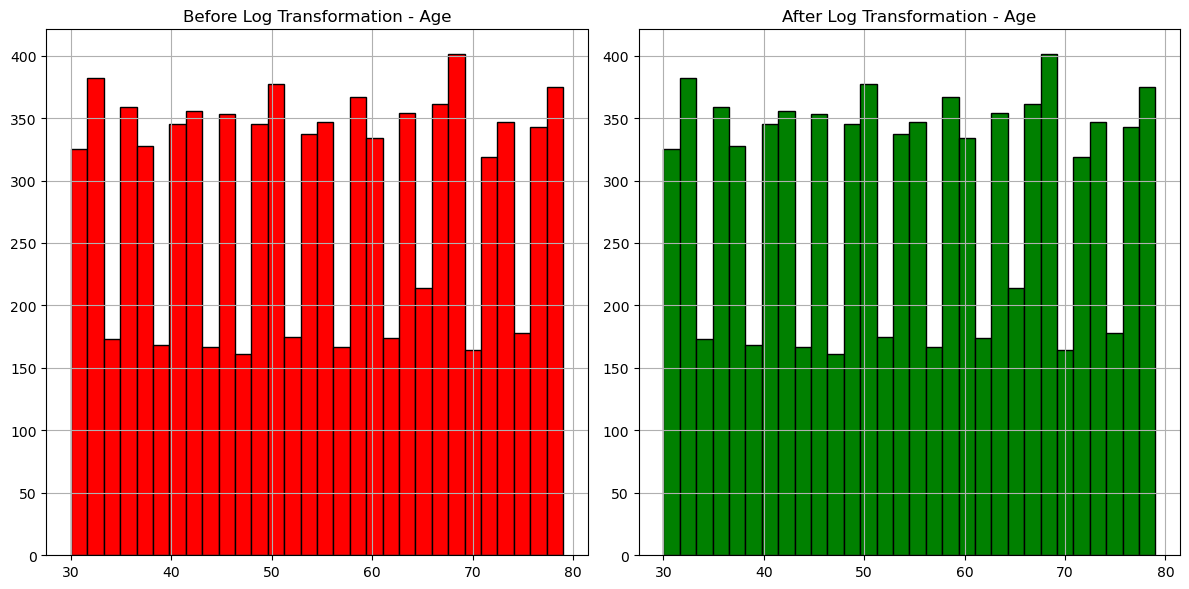

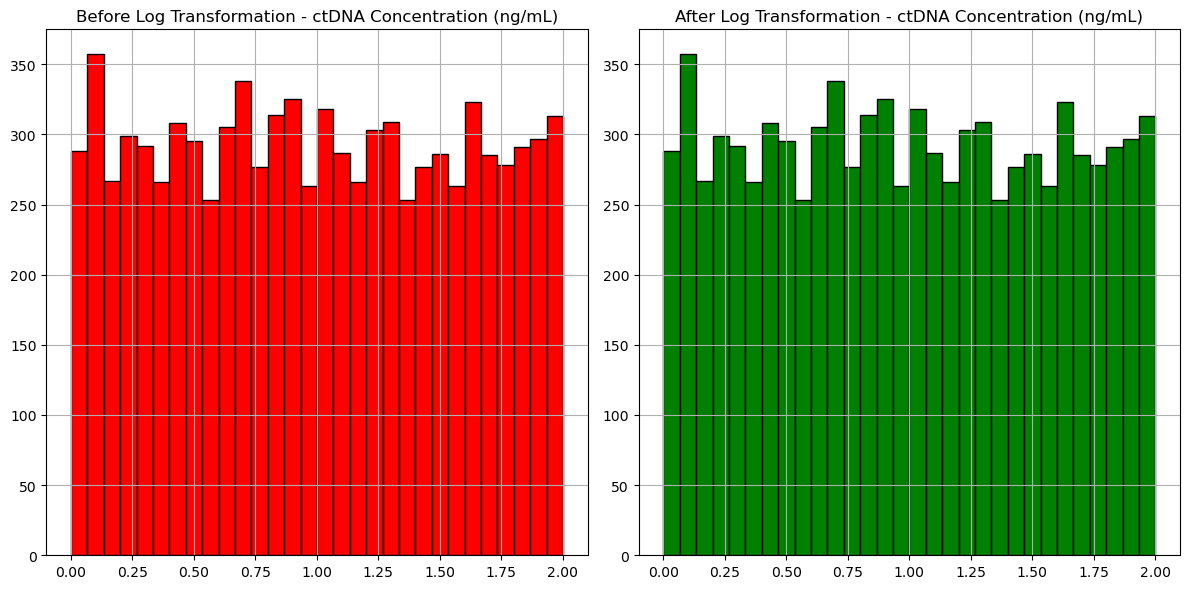

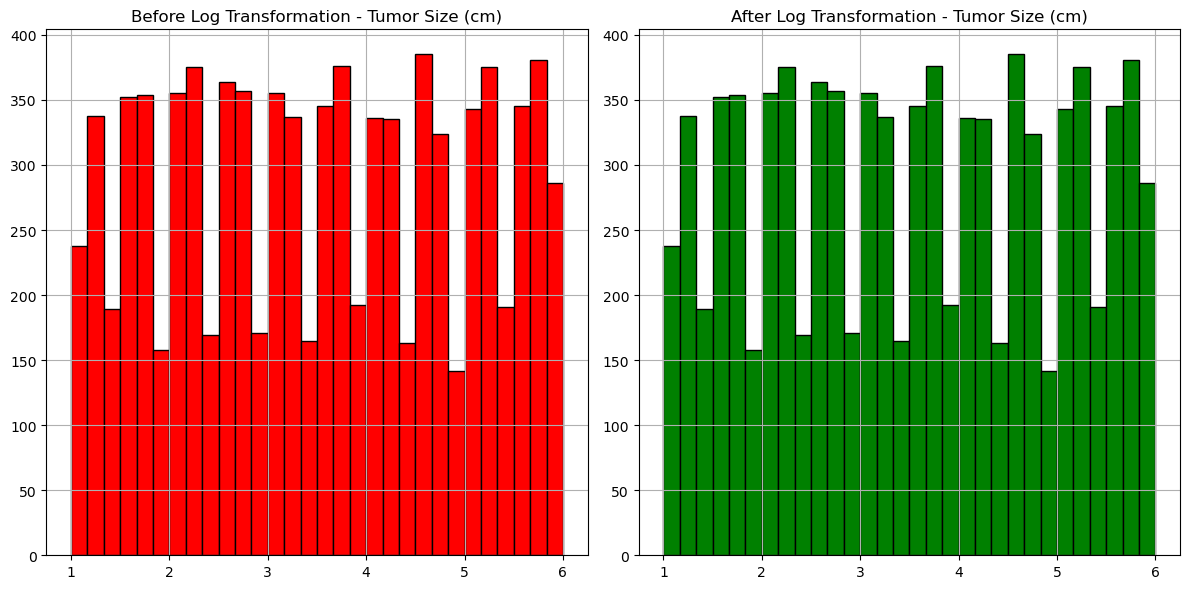

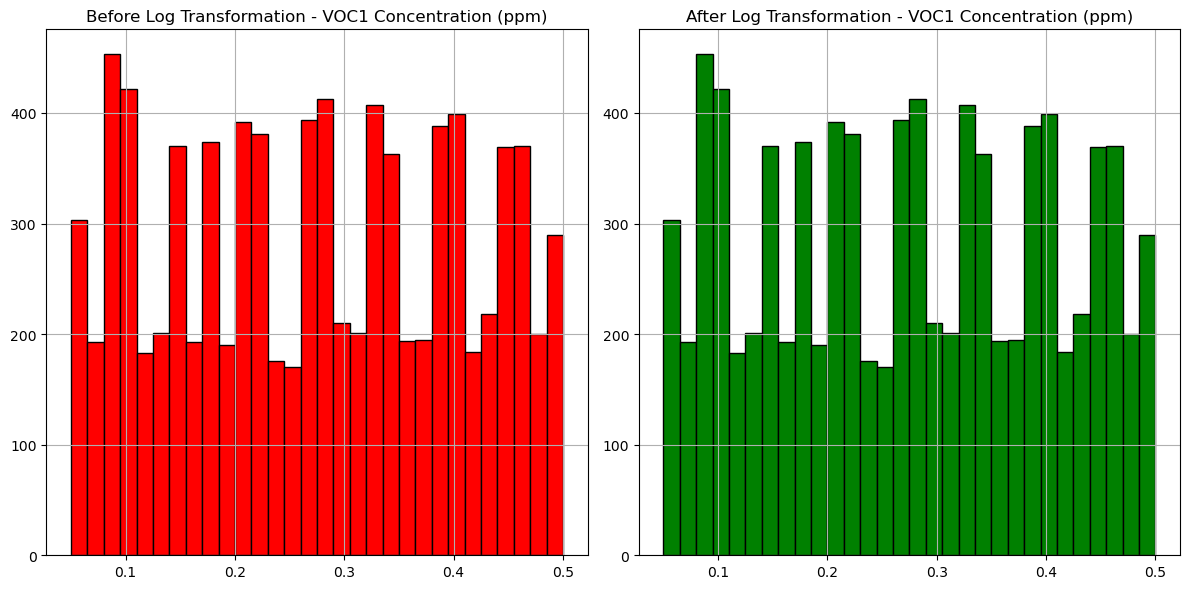

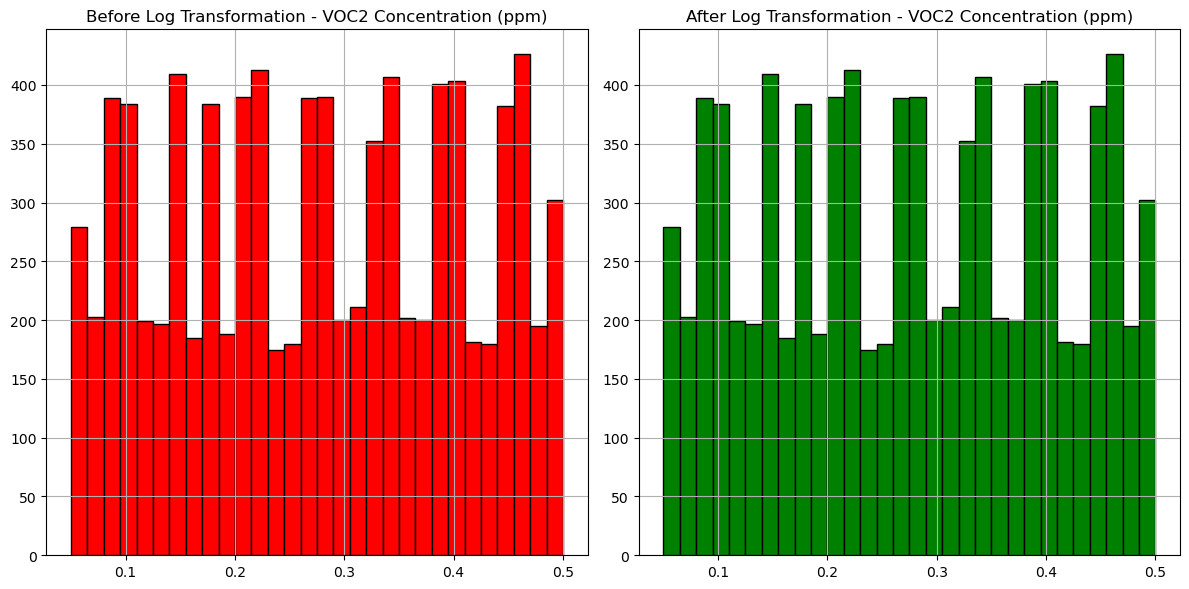

In [43]:
# Visualizing the distribution before and after log transformation
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=30, color='red', edgecolor='black')
    plt.title(f"Before Log Transformation - {col}")
    
    plt.subplot(1, 2, 2)
    data_no_outliers[col].hist(bins=30, color='green', edgecolor='black')
    plt.title(f"After Log Transformation - {col}")
    
    plt.tight_layout()
    plt.show()

In [43]:
###Exploratory Data Analysis (EDA)

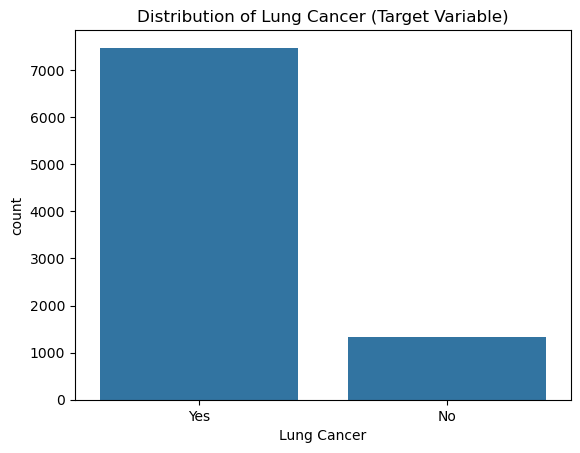

In [45]:
# Visualize the class distribution of the target variable
sns.countplot(x='Lung Cancer', data=data)
plt.title("Distribution of Lung Cancer (Target Variable)")
plt.show()

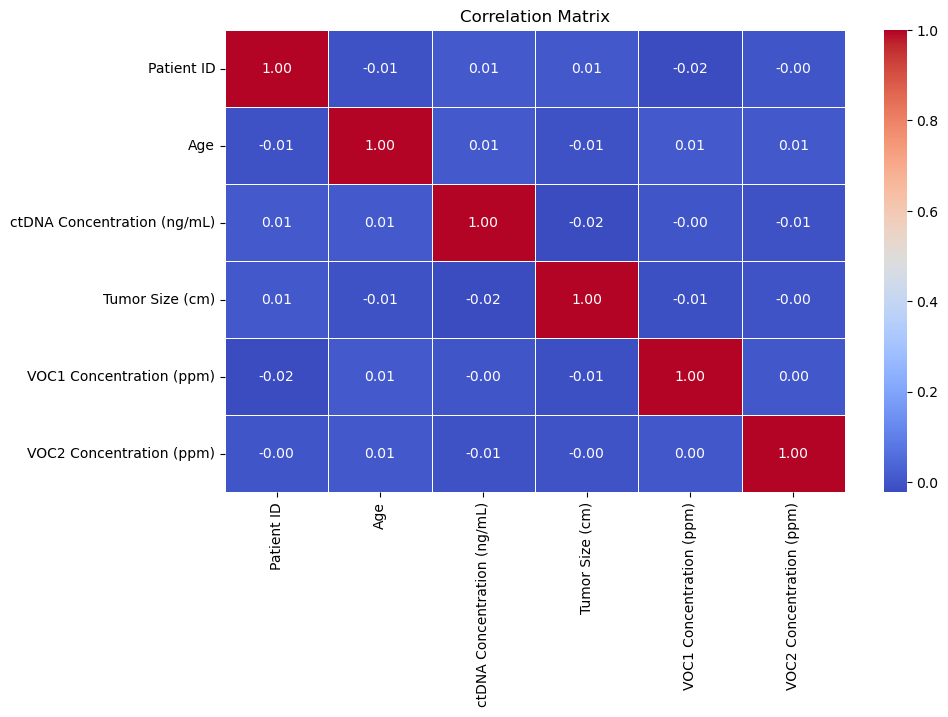

In [47]:
# Compute and plot the correlation matrix
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()
numerical_columns
correlation_matrix

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


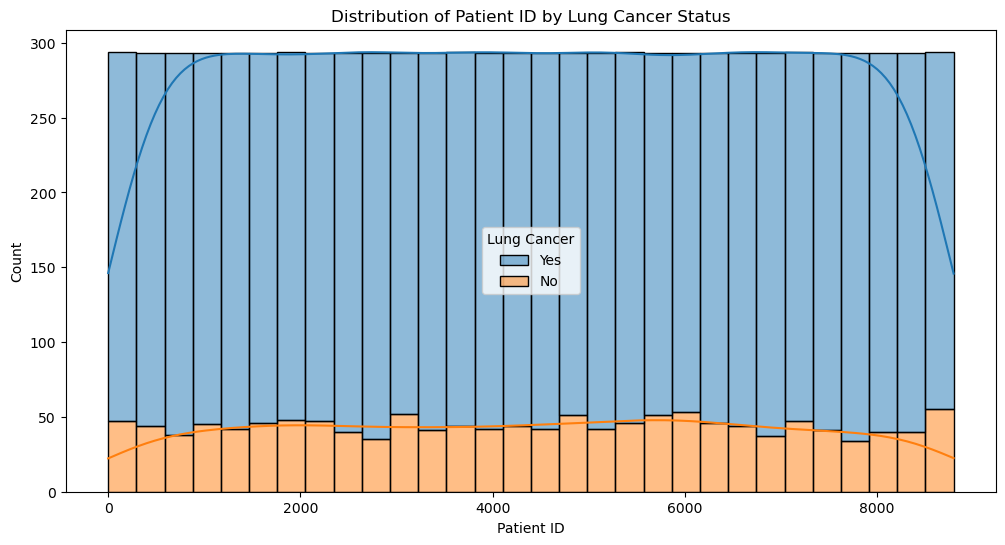

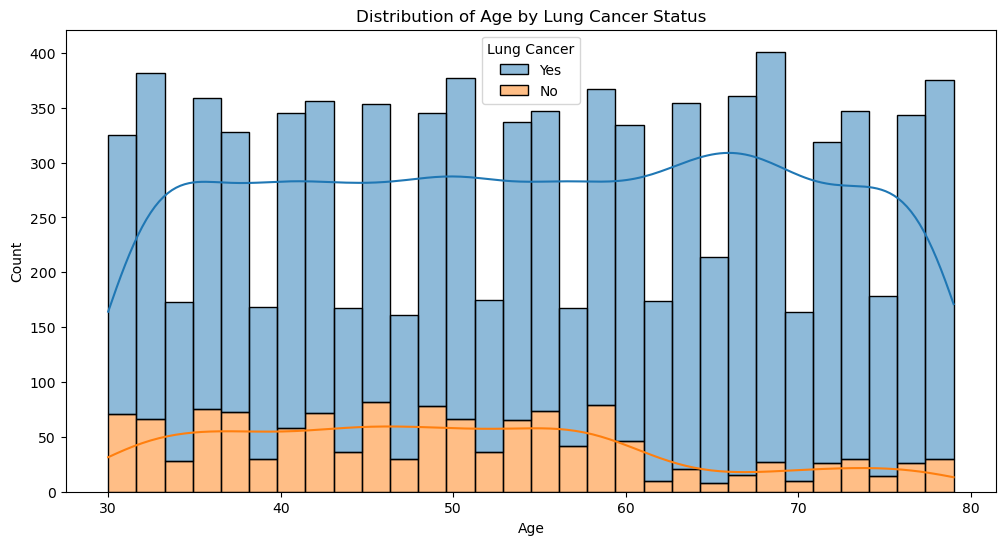

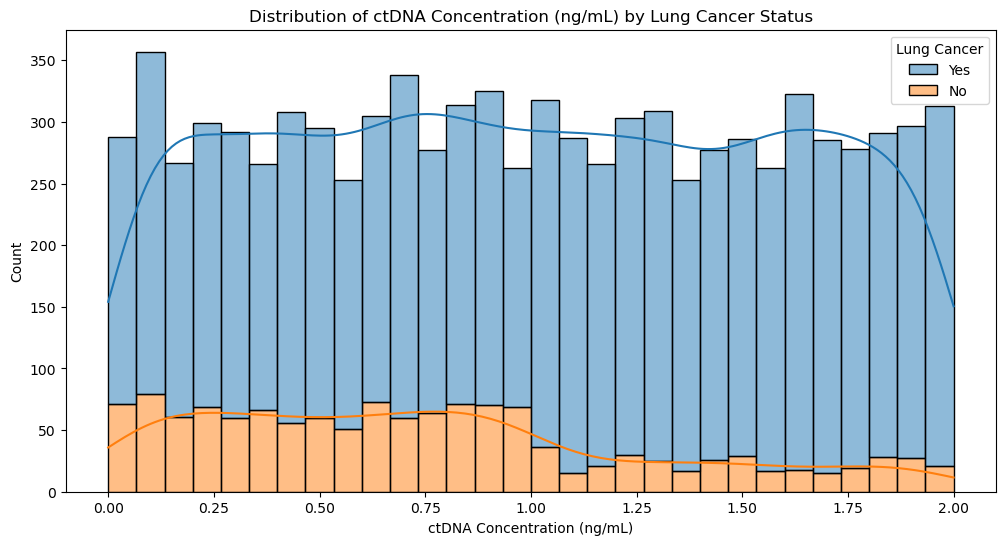

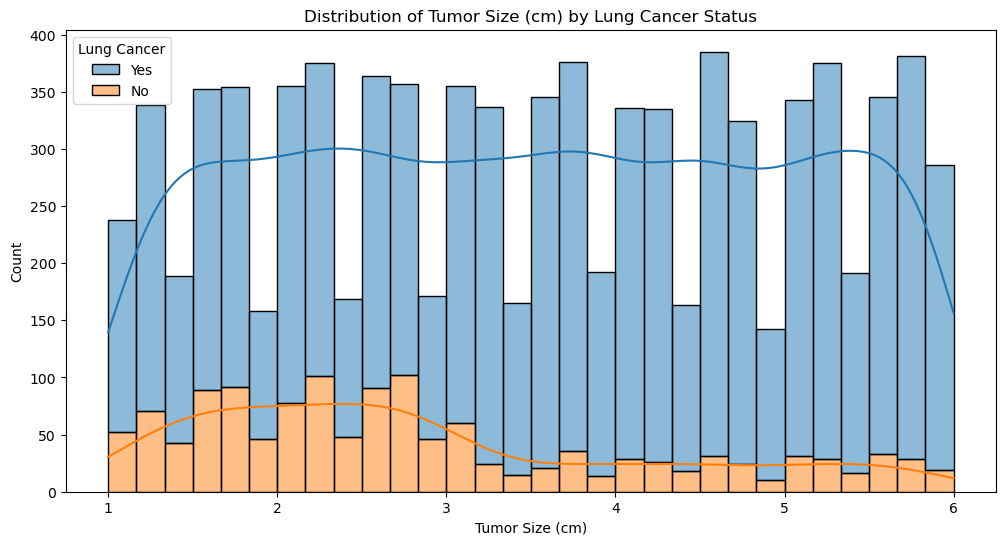

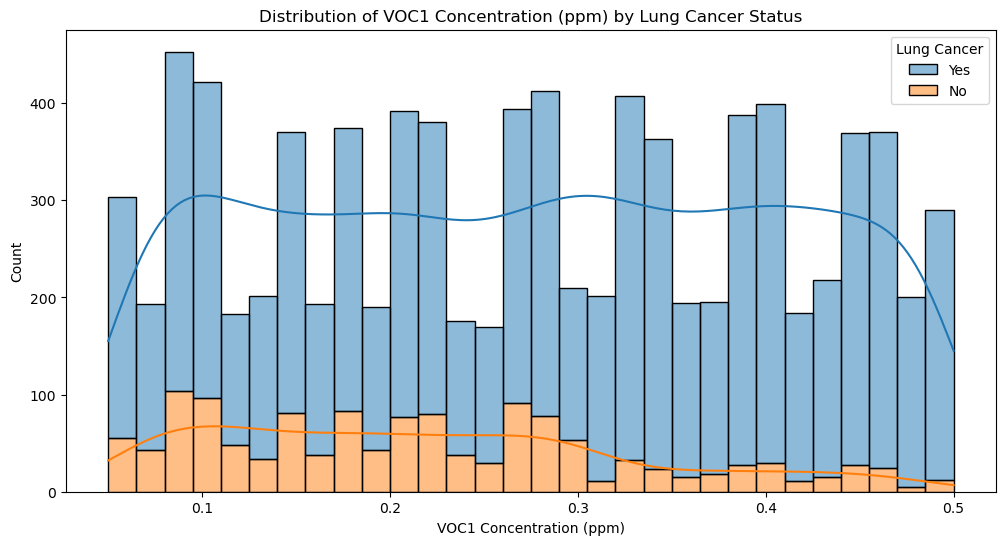

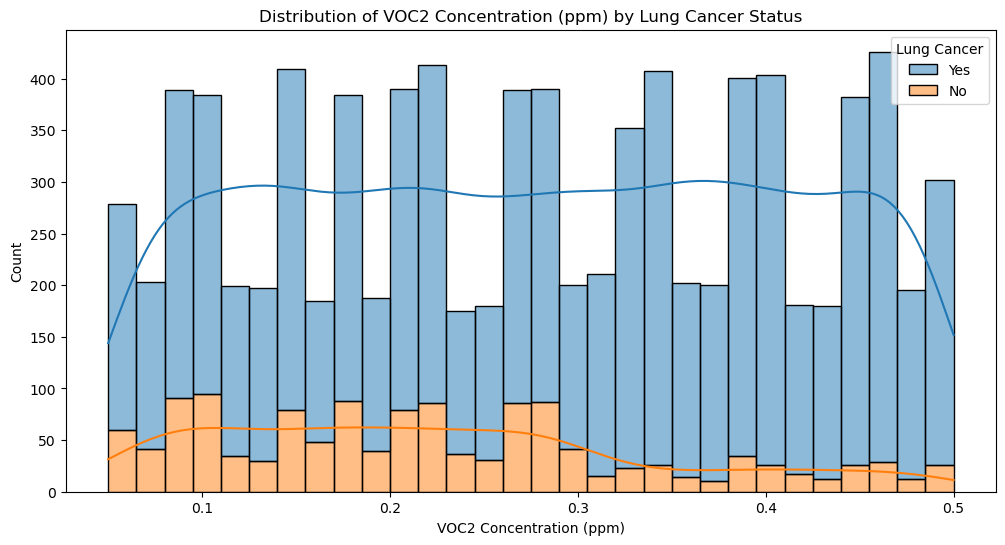

In [49]:
# Histograms of numerical features by target class
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=col, hue='Lung Cancer', multiple='stack', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Lung Cancer Status')
    plt.show()

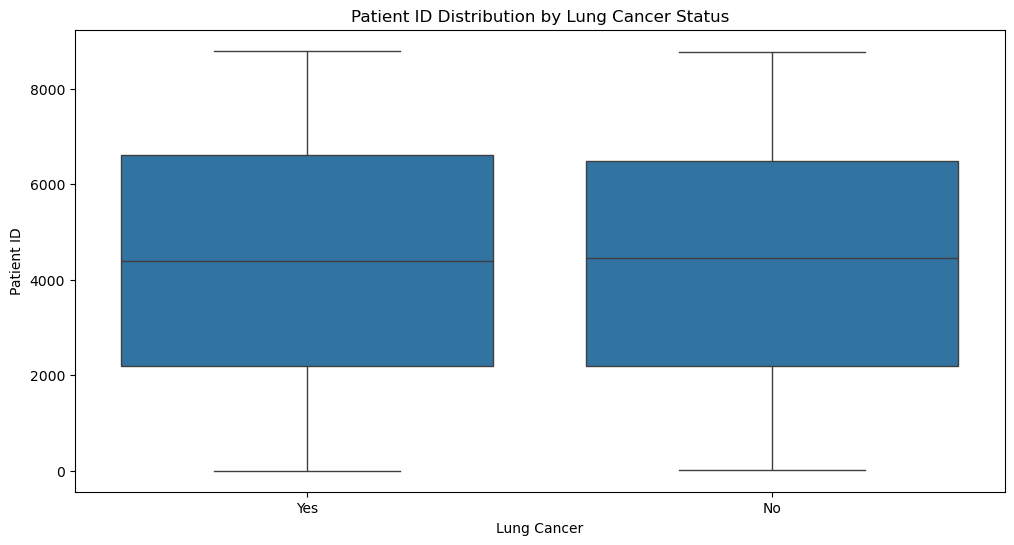

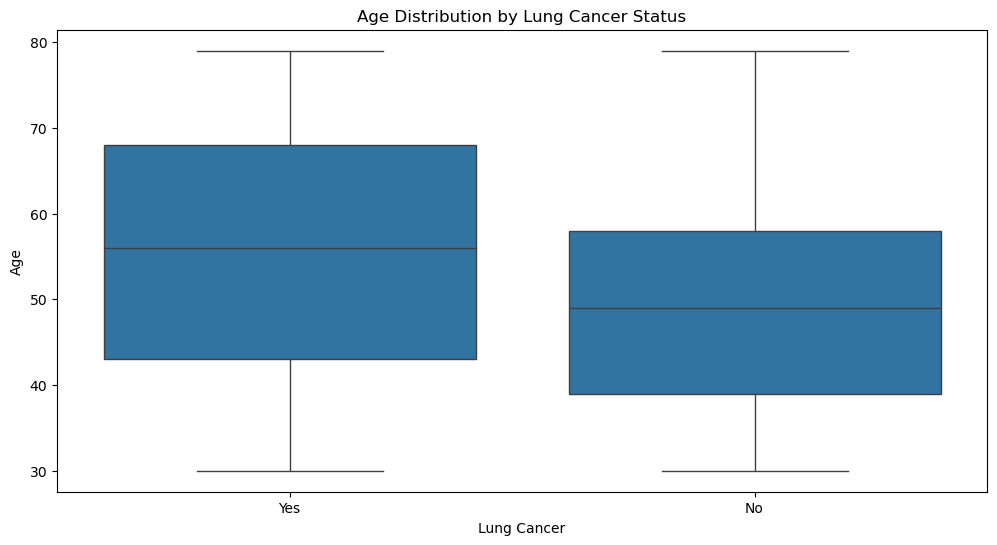

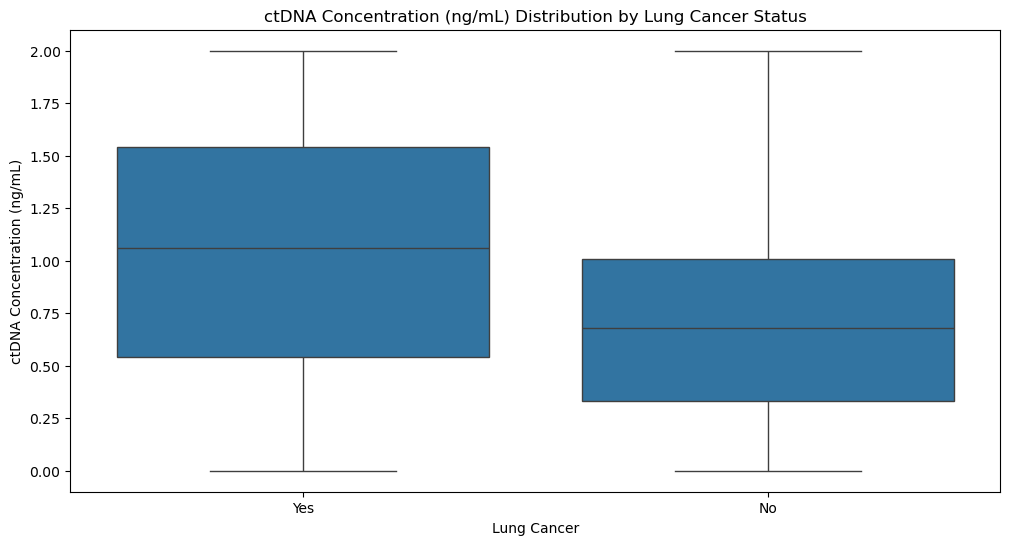

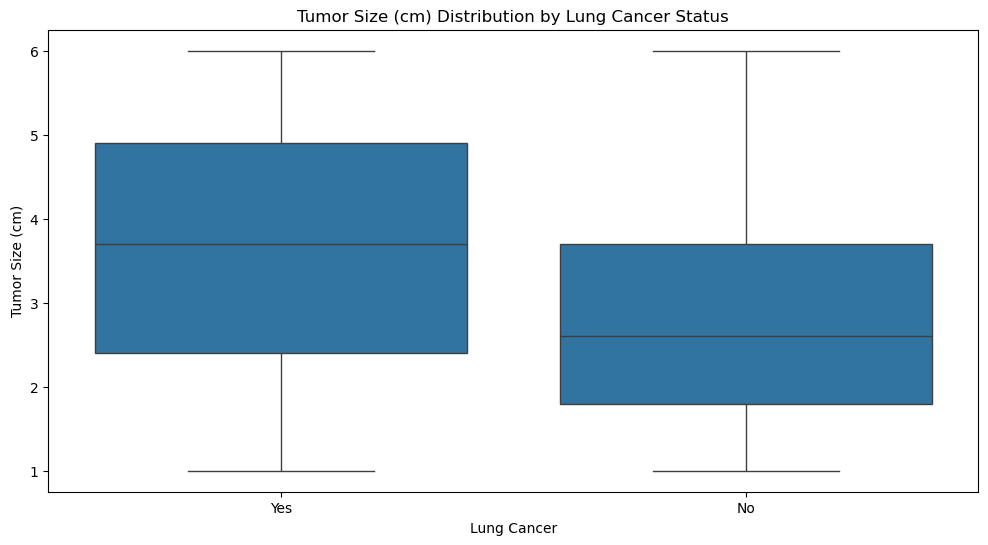

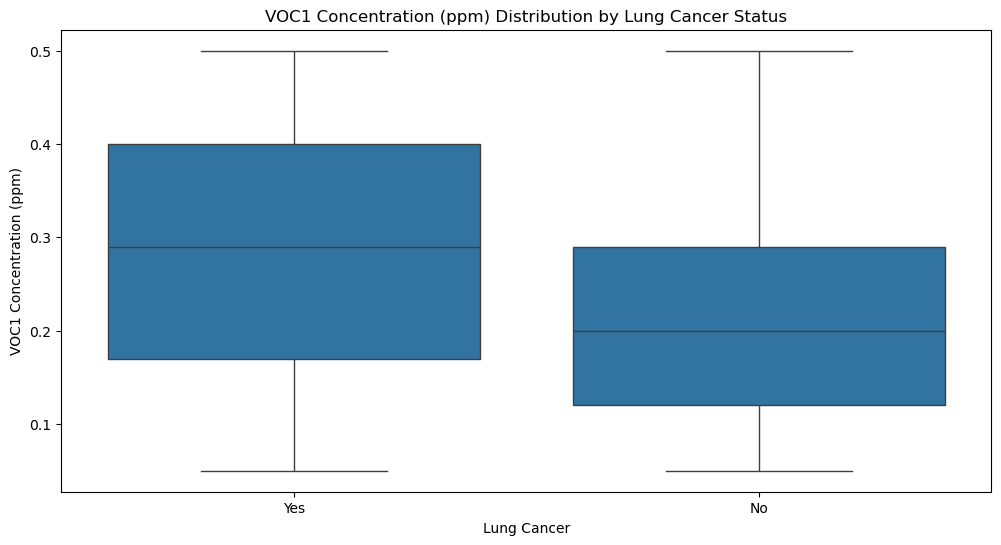

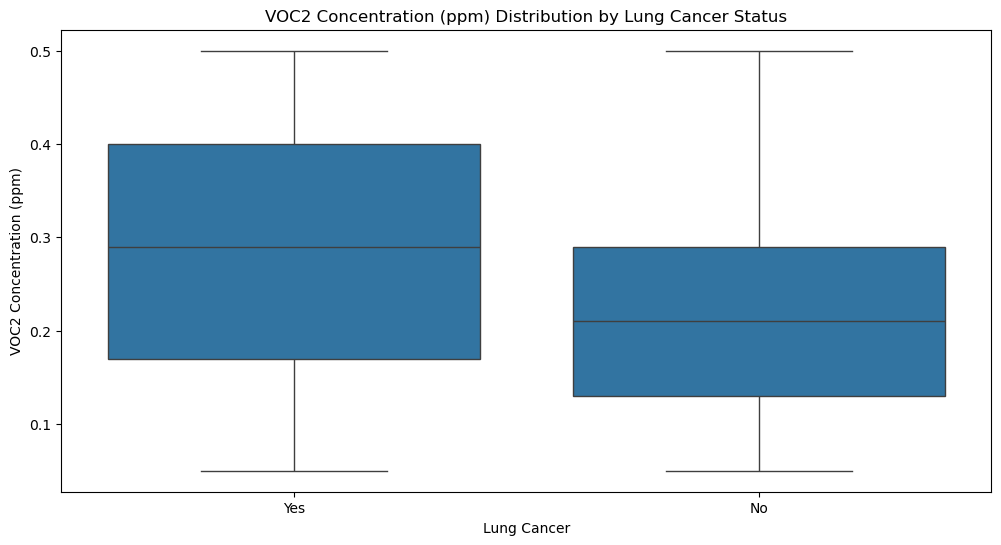

In [51]:
# Boxplots of numerical features by target class
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Lung Cancer', y=col, data=data)
    plt.title(f'{col} Distribution by Lung Cancer Status')
    plt.show()

In [53]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Smoking History', 'Family History', 'Treatment History', 'Mutation Type', 'Biopsy Result', 'Gene'], drop_first=True)
data_encoded

,Patient ID,Age,ctDNA Concentration (ng/mL),Tumor Size (cm),VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer,Gender_Male,Smoking History_Yes,Family History_Yes,Treatment History_Radiotherapy,Treatment History_Surgery,Mutation Type_Insertion,Mutation Type_Point Mutation,Biopsy Result_Positive,Gene_EGFR,Gene_KRAS,Gene_TP53
0,1,53,0.02,2.5,0.17,0.22,Yes,True,True,False,True,False,False,False,True,False,True,False
1,2,66,1.61,1.1,0.18,0.39,Yes,False,False,False,True,False,True,False,True,False,True,False
2,3,40,1.36,4.7,0.26,0.31,Yes,False,False,False,True,False,False,False,False,True,False,False
3,4,43,1.93,1.7,0.26,0.29,Yes,True,True,False,False,False,True,False,True,False,True,False
4,5,44,0.63,5.4,0.22,0.36,Yes,False,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,8792,55,0.74,5.9,0.25,0.13,Yes,False,True,False,False,True,False,False,False,True,False,False
8792,8793,67,1.41,4.6,0.26,0.26,Yes,True,False,False,False,True,False,False,False,False,False,True
8793,8794,40,1.61,3.1,0.25,0.21,Yes,False,True,False,False,True,True,False,True,False,True,False
8794,8795,52,0.07,1.5,0.39,0.39,Yes,False,False,True,False,False,False,False,True,False,False,True


In [55]:
# Standardize numerical features
scaler = StandardScaler()
scaled_numerical_columns = ['Age', 'ctDNA Concentration (ng/mL)', 'Tumor Size (cm)', 'VOC1 Concentration (ppm)', 'VOC2 Concentration (ppm)']
data_encoded[scaled_numerical_columns] = scaler.fit_transform(data_encoded[scaled_numerical_columns])

In [57]:
# Check the scaled data
print(data_encoded.head())

   Patient ID       Age  ctDNA Concentration (ng/mL)  Tumor Size (cm)  \
0           1 -0.114487                    -1.678938        -0.702205   
1           2  0.786437                     1.064063        -1.669426   
2           3 -1.015410                     0.632774         0.817712   
3           4 -0.807504                     1.616114        -1.254903   
4           5 -0.738203                    -0.626592         1.301322   

   VOC1 Concentration (ppm)  VOC2 Concentration (ppm) Lung Cancer  \
0                 -0.789855                 -0.430372         Yes   
1                 -0.713352                  0.874699         Yes   
2                 -0.101333                  0.260548         Yes   
3                 -0.101333                  0.107010         Yes   
4                 -0.407343                  0.644392         Yes   

   Gender_Male  Smoking History_Yes  Family History_Yes  \
0         True                 True               False   
1        False              

In [59]:
# Split the data into features (X) and target (y)
X = data_encoded.drop(columns=['Lung Cancer'])  # Features
y = data_encoded['Lung Cancer']  # Target
X
y

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8791    Yes
8792    Yes
8793    Yes
8794    Yes
8795    Yes
Name: Lung Cancer, Length: 8796, dtype: object

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
# Check the shapes of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (6157, 17)
Test set shape: (2639, 17)


In [65]:
# Handle class imbalance using SMOTE (Oversampling minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [67]:
# Convert y_resampled to a Pandas Series for value_counts()
y_resampled_series = pd.Series(y_resampled)


In [71]:
# Check the class distribution after resampling
print(f"Resampled class distribution:\n{y_resampled_series.value_counts()}")

Resampled class distribution:
Lung Cancer
Yes    5235
No     5235
Name: count, dtype: int64


In [73]:
# Train a Logistic Regression model with solver 'liblinear' and max_iter increased
model = LogisticRegression(max_iter=1000, solver='liblinear')  # Increased max_iter to 1000
model.fit(X_resampled, y_resampled)


LogisticRegression(max_iter=1000, solver='liblinear')

In [77]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

Logistic Regression - Accuracy: 0.5659090909090909
Logistic Regression - Precision: 1.0
Logistic Regression - Recall: 0.4841323430114787
Logistic Regression - F1 Score: 0.6524112829845314
Logistic Regression - Confusion Matrix:
[[279   0]
 [764 717]]
Logistic Regression - ROC AUC: 0.9603968063814289
K-Nearest Neighbors - Accuracy: 0.8244318181818182
K-Nearest Neighbors - Precision: 0.8422897196261683
K-Nearest Neighbors - Recall: 0.9736664415935179
K-Nearest Neighbors - F1 Score: 0.9032258064516129
K-Nearest Neighbors - Confusion Matrix:
[[   9  270]
 [  39 1442]]
K-Nearest Neighbors - ROC AUC: 0.5060527736030338
Support Vector Machine - Accuracy: 0.8414772727272727
Support Vector Machine - Precision: 0.8414772727272727
Support Vector Machine - Recall: 1.0
Support Vector Machine - F1 Score: 0.9139154581919161
Support Vector Machine - Confusion Matrix:
[[   0  279]
 [   0 1481]]
Support Vector Machine - ROC AUC: 0.6132299448933807
Decision Tree - Accuracy: 0.9096590909090909
Decision Tr

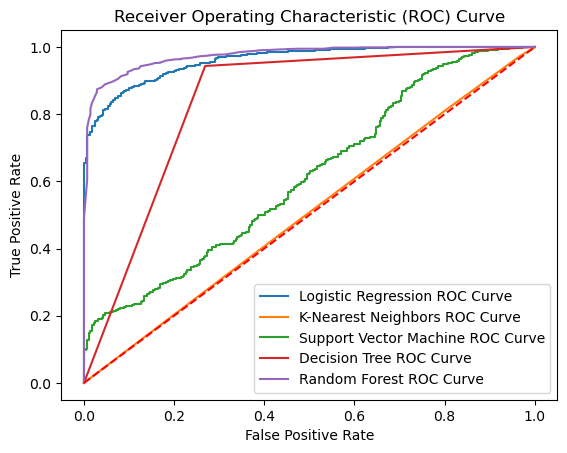

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'Yes'/'No' to 1/0 for proper ROC calculation
y_test_numeric = np.where(y_test == 'Yes', 1, 0)
y_train_numeric = np.where(y_train == 'Yes', 1, 0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to preserve feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=800)
log_reg_model.fit(X_train, y_train)
y_pred_labels_log_reg = log_reg_model.predict(X_test_scaled)

# K-Nearest Neighbors (KNN) Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_labels_knn = knn_model.predict(X_test)

# Support Vector Machine (SVM) Model
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_labels_svm = svm_model.predict(X_test)

# Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_labels_dt = dt_model.predict(X_test)

# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_labels_rf = rf_model.predict(X_test)

# Function to calculate and store metrics for each model
def calculate_metrics(model_name, model, X_test, y_test, y_pred_labels):
    # Store metrics for evaluation
    y_pred_numeric = np.where(y_pred_labels == 'Yes', 1, 0)
    model_results = {
        'accuracy': accuracy_score(y_test_numeric, y_pred_numeric),
        'precision': precision_score(y_test_numeric, y_pred_numeric, pos_label=1, zero_division=1),
        'recall': recall_score(y_test_numeric, y_pred_numeric, pos_label=1, zero_division=1),
        'f1_score': f1_score(y_test_numeric, y_pred_numeric, pos_label=1, zero_division=1),
        'confusion_matrix': confusion_matrix(y_test_numeric, y_pred_numeric),
        'roc_auc': auc(*roc_curve(y_test_numeric, model.predict_proba(X_test)[:, 1])[:2])  # Numeric labels for ROC
    }
    
    print(f"{model_name} - Accuracy: {model_results['accuracy']}")
    print(f"{model_name} - Precision: {model_results['precision']}")
    print(f"{model_name} - Recall: {model_results['recall']}")
    print(f"{model_name} - F1 Score: {model_results['f1_score']}")
    print(f"{model_name} - Confusion Matrix:\n{model_results['confusion_matrix']}")
    print(f"{model_name} - ROC AUC: {model_results['roc_auc']}")

    # Optional: Plot the ROC Curve
    fpr, tpr, _ = roc_curve(y_test_numeric, model.predict_proba(X_test)[:, 1])  # Numeric y_test for ROC
    plt.plot(fpr, tpr, label=f'{model_name} ROC Curve')
    
# Logistic Regression Metrics
calculate_metrics('Logistic Regression', log_reg_model, X_test, y_test, y_pred_labels_log_reg)

# KNN Metrics
calculate_metrics('K-Nearest Neighbors', knn_model, X_test, y_test, y_pred_labels_knn)

# SVM Metrics
calculate_metrics('Support Vector Machine', svm_model, X_test, y_test, y_pred_labels_svm)

# Decision Tree Metrics
calculate_metrics('Decision Tree', dt_model, X_test, y_test, y_pred_labels_dt)

# Random Forest Metrics
calculate_metrics('Random Forest', rf_model, X_test, y_test, y_pred_labels_rf)

# Show ROC Curve for all models
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Logistic Regression - Accuracy: 0.5659090909090909
Logistic Regression - Precision: 1.0
Logistic Regression - Recall: 0.4841323430114787
Logistic Regression - F1 Score: 0.6524112829845314
Logistic Regression - Confusion Matrix:
[[279   0]
 [764 717]]
Logistic Regression - ROC AUC: 0.9402442890713676


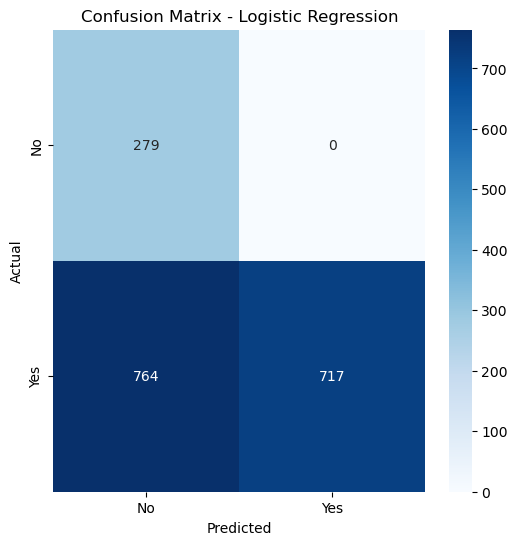

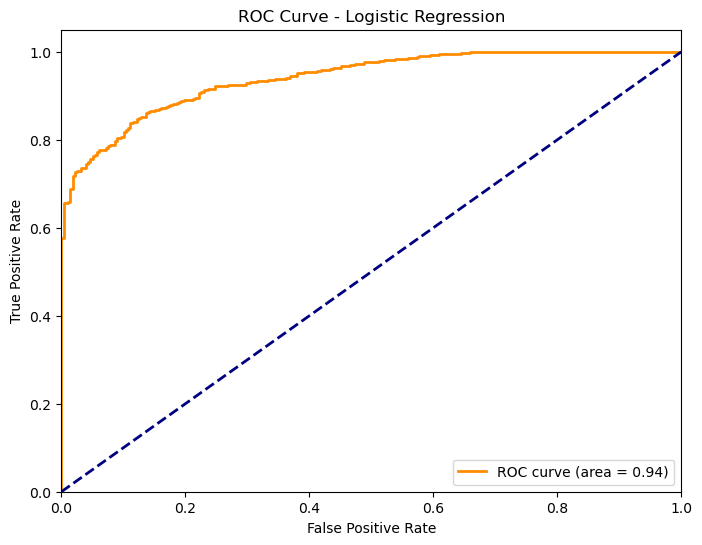

KNN - Accuracy: 0.8244318181818182
KNN - Precision: 0.8422897196261683
KNN - Recall: 0.9736664415935179
KNN - F1 Score: 0.9032258064516129
KNN - Confusion Matrix:
[[   9  270]
 [  39 1442]]
KNN - ROC AUC: 0.5060527736030338


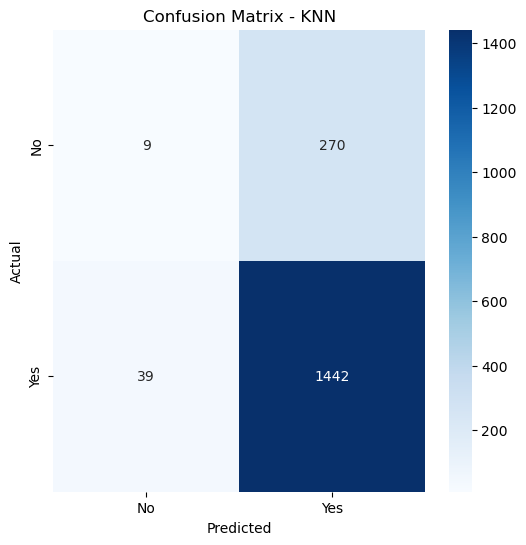

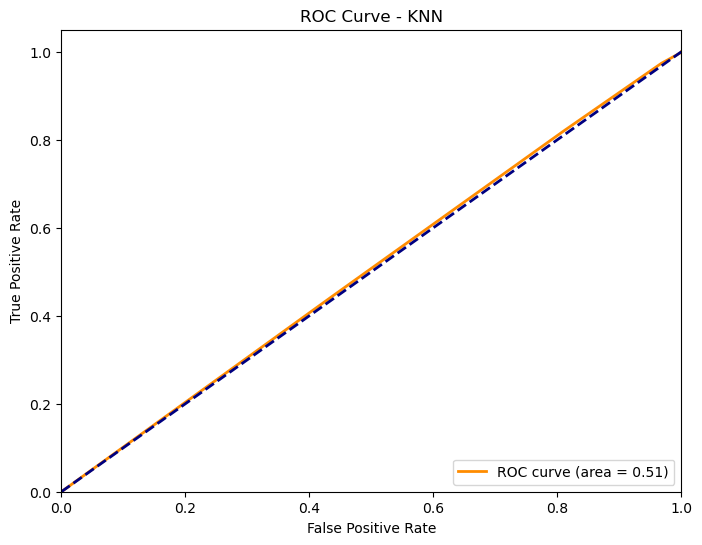

SVM - Accuracy: 0.8414772727272727
SVM - Precision: 0.8414772727272727
SVM - Recall: 1.0
SVM - F1 Score: 0.9139154581919161
SVM - Confusion Matrix:
[[   0  279]
 [   0 1481]]
SVM - ROC AUC: 0.6132299448933807


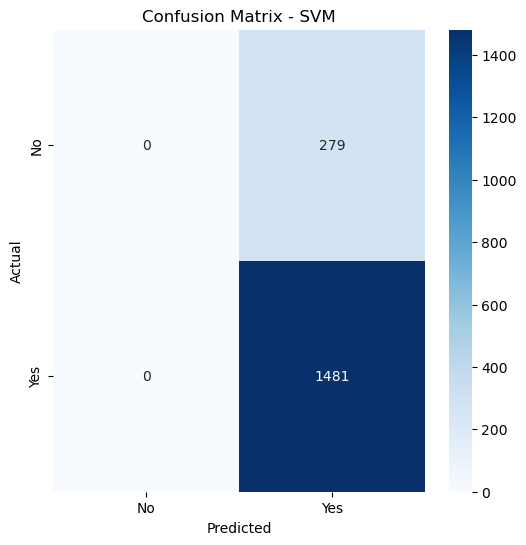

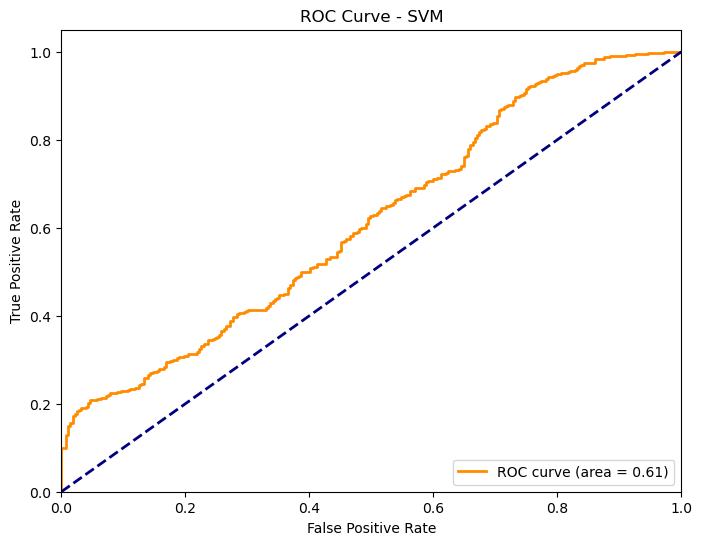

Decision Tree - Accuracy: 0.9107954545454545
Decision Tree - Precision: 0.9491180461329715
Decision Tree - Recall: 0.9446320054017556
Decision Tree - F1 Score: 0.9468697123519458
Decision Tree - Confusion Matrix:
[[ 204   75]
 [  82 1399]]
Decision Tree - ROC AUC: 0.8379074005503402


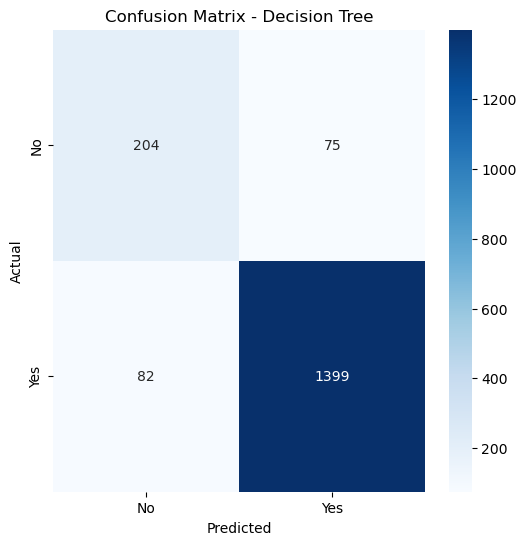

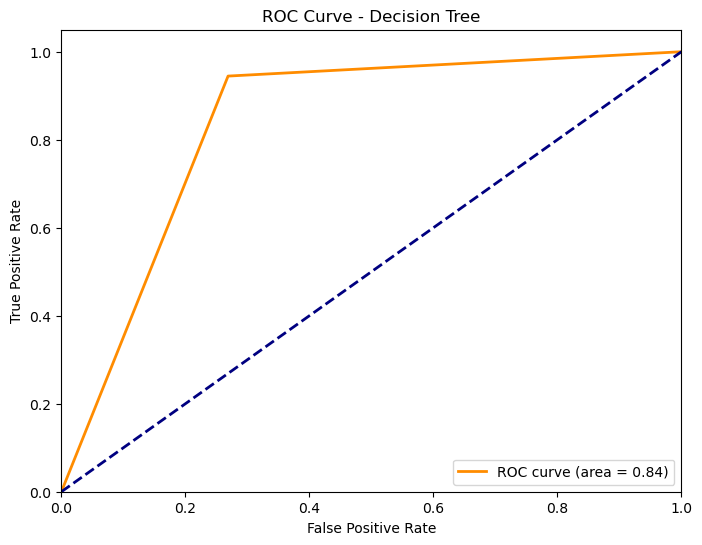

Random Forest - Accuracy: 0.9261363636363636
Random Forest - Precision: 0.931629392971246
Random Forest - Recall: 0.9844699527346388
Random Forest - F1 Score: 0.9573210768220617
Random Forest - Confusion Matrix:
[[ 172  107]
 [  23 1458]]
Random Forest - ROC AUC: 0.9764617048927998


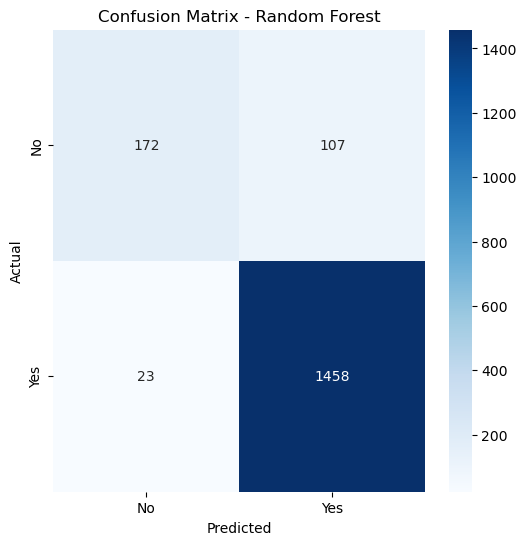

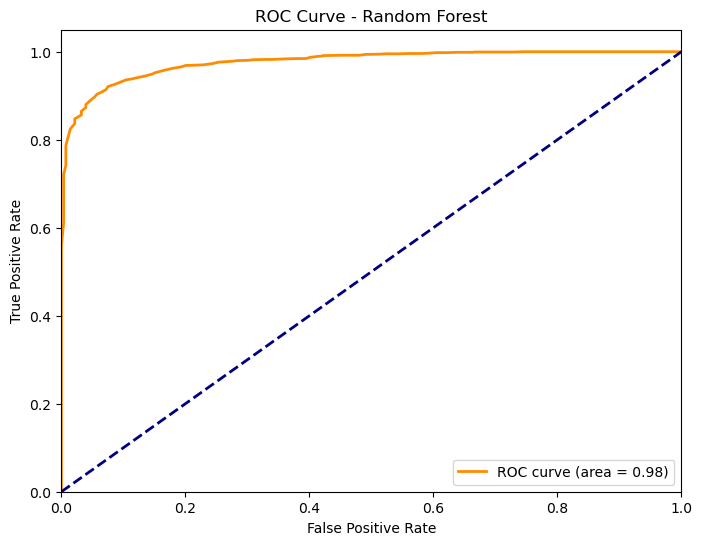

In [71]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to calculate and store metrics for each model
def calculate_metrics(model_name, model, X_test, y_test, y_pred_labels):
    # Store metrics for evaluation
    y_pred_numeric = np.where(y_pred_labels == 'Yes', 1, 0)
    
    model_results = {
        'accuracy': accuracy_score(y_test_numeric, y_pred_numeric),
        'precision': precision_score(y_test_numeric, y_pred_numeric, pos_label=1, zero_division=1),
        'recall': recall_score(y_test_numeric, y_pred_numeric, pos_label=1, zero_division=1),
        'f1_score': f1_score(y_test_numeric, y_pred_numeric, pos_label=1, zero_division=1),
        'confusion_matrix': confusion_matrix(y_test_numeric, y_pred_numeric),
        'roc_auc': auc(*roc_curve(y_test_numeric, model.predict_proba(X_test)[:, 1])[:2])  # Numeric labels for ROC
    }
    
    # Print the results
    print(f"{model_name} - Accuracy: {model_results['accuracy']}")
    print(f"{model_name} - Precision: {model_results['precision']}")
    print(f"{model_name} - Recall: {model_results['recall']}")
    print(f"{model_name} - F1 Score: {model_results['f1_score']}")
    print(f"{model_name} - Confusion Matrix:\n{model_results['confusion_matrix']}")
    print(f"{model_name} - ROC AUC: {model_results['roc_auc']}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(model_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test_numeric, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Now, calculate metrics for each model
calculate_metrics('Logistic Regression', log_reg_model, X_test_scaled, y_test, y_pred_labels_log_reg)
calculate_metrics('KNN', knn_model, X_test, y_test, y_pred_labels_knn)
calculate_metrics('SVM', svm_model, X_test, y_test, y_pred_labels_svm)
calculate_metrics('Decision Tree', dt_model, X_test, y_test, y_pred_labels_dt)
calculate_metrics('Random Forest', rf_model, X_test, y_test, y_pred_labels_rf)


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Check if X_train and y_train are defined
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Define your RandomForestClassifier model
rf_model = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to your training data
print("Starting grid search...")
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Print the best parameters
print("Best parameters for RandomForest:", best_params_rf)

# Optionally, you can print the best score obtained
print("Best accuracy score:", grid_search_rf.best_score_)


X_train shape: (7036, 17)
y_train shape: (7036,)
Starting grid search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy score: 0.9303588591135232


In [102]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [104]:
# Creating a pipeline with preprocessing and Random Forest Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features 
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest model
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [106]:
from sklearn.preprocessing import LabelEncoder

#Converting target labels to numeric

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [108]:
#Train the model
pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [110]:
#Save the trained model
joblib.dump(pipeline, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [114]:
#Test with Unseen Data (evaluate the model on test data)
y_pred_encoded = pipeline.predict(X_test)
y_pred_encoded

array([1, 1, 1, ..., 0, 1, 1])

In [116]:
#Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)
roc_auc = roc_auc_score(y_test_encoded, pipeline.predict_proba(X_test)[:, 1])  # ROC AUC requires probability estimates
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# 5. Convert numeric labels back to string labels for interpretation
y_pred_label = label_encoder.inverse_transform(y_pred_encoded)
y_test_label = label_encoder.inverse_transform(y_test_encoded)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.9295454545454546
Precision: 0.934657270980141
Recall: 0.9851451721809588
F1 Score: 0.9592373438527285
ROC AUC: 0.9753472297851641
Confusion Matrix:
[[ 177  102]
 [  22 1459]]


In [118]:
#Interpretation of Results (Conclusion)
print("\nInterpretation of Results:")
if accuracy >= 0.90:
    print("The model performs excellently with high accuracy.")
elif accuracy >= 0.80:
    print("The model performs well, but there may be some room for improvement.")
else:
    print("The model needs improvement, especially if the accuracy is low.")

if recall > precision:
    print("The model is biased toward identifying positive cases, which is good if false negatives are costly.")
else:
    print("The model has balanced precision and recall, indicating good overall performance.")


Interpretation of Results:
The model performs excellently with high accuracy.
The model is biased toward identifying positive cases, which is good if false negatives are costly.
